In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix, lil_matrix,identity
import seaborn as sns
from datetime import datetime

In [0]:
box_c = [(69,111, 69+18, 111+18),(69,264, 69+18, 264+18),
           (138,12, 138+18, 12+18),(138,165, 138+18, 165+18),
           (192,111, 192+18, 111+18),(192,264, 192+18, 264+18),
           (261,12, 261+18, 12+18),(261,165, 261+18, 165+18)]


house_t1_c = [(69,12, 69+18, 12+78, 69+30, 12+18),(69,165, 69+18, 165+78, 69+30, 165+18),
              (192,12, 192+18, 12+78, 192+30, 12+18),(192,165, 192+18, 165+78, 192+30, 165+18)]


house_t2_c = [(138,51, 138+18, 51+78, 138-12, 51+60),(138,204, 138+18, 204+78, 138-12, 204+60),
              (261,51, 261+18, 51+78, 261-12, 51+60),(261,204, 261+18, 204+78, 261-12, 204+60)]

In [0]:
def check_inside_house (x, y):

  # check inside box house

  flag1 = False

  for box in box_c:
    if x>box[0] and x < box[2] and y > box[1] and y < box[3]:
      flag1 = True
      break

  flag2 = False
  for house_t1 in house_t1_c:
    if ((x > house_t1[0] and x<house_t1[2] and y > house_t1[1] and y < house_t1[3]) or (x > house_t1[0] and x<house_t1[4] and y > house_t1[1] and y < house_t1[5])):
      flag2 = True
      break

  flag3 = False
  for house_t2 in house_t2_c:
    if ((x > house_t2[0] and x<house_t2[2] and y > house_t2[1] and y < house_t2[3]) or (x > house_t2[4] and x<house_t2[2] and y > house_t2[5] and y < house_t2[3])):
      flag3 = True
      break

  
  return flag1 or flag2 or flag3

  

In [0]:
def convection_diffusion(n = 300, iters = 1000, x_inp = None, eps = 1e-8):   
  start_t = datetime.now()
  k = 0.5
  h = 1/300
  tau = h*h/(4*k)
  lambda1 = 1.0
  lambda2 = 0


  N = n * n
  
  x = np.zeros((N, 1))
  for i in range(300):
    x[300*i,0]=1
    
  A = lil_matrix((N, N))
  
  b = np.zeros(N)
    
  x_n = [1, -1, 0, 0]
  y_n = [0, 0, 1, -1]
  u0 = 1-4*(tau*k)/(h**2)
  coeffs = [tau*(k/(h**2)-lambda1/(2*h)),
            tau*(k/(h**2)+lambda1/(2*h)),
            tau*(k/(h**2)-lambda2/(2*h)),
            tau*(k/(h**2)+lambda2/(2*h))]

  for i in range(0, n): 
      for e in range(0, n):
          ind = i*n+e
          A[ind,ind] = u0
          for j in range(0, 4):
              x_neigb = i + x_n[j]
              y_neigb = e + y_n[j]
              coeff = coeffs[j]

              if x_neigb==0:
                  b[ind] -= coeff
              elif check_inside_house(x_neigb,y_neigb) or (x_neigb>299 or y_neigb>299 or y_neigb == 0):
                  A[ind,ind] += coeff
              else:
                  A[ind,x_neigb*n+y_neigb] = coeff

  A = csr_matrix(A)

  b = b.reshape(N, -1)
  early_stop = False
  for i in range(iters):
    x_new = (A * x + b)
    error = np.max(np.abs(x_new - x))
    if error < eps:
        print("For eps = {}, {} of steps were taken, total execution time = {}".format(eps, i, datetime.now()-start_t))
        early_stop = True
        break
    x = x_new
  
  if not early_stop:
    print("For eps = {}, {} of steps were taken, total execution time = {}".format(eps, iters, datetime.now()-start_t))
  return x.reshape((n,n))

In [0]:
def print_output(m, x_res):
  print(m)
  for i in range(m):
    s = ''
    for j in range(1, m):
      s = s+str(x_res[1, j])+" "
    print(s)

For eps = 1e-05, 5000 of steps were taken, total execution time = 0:00:06.340383


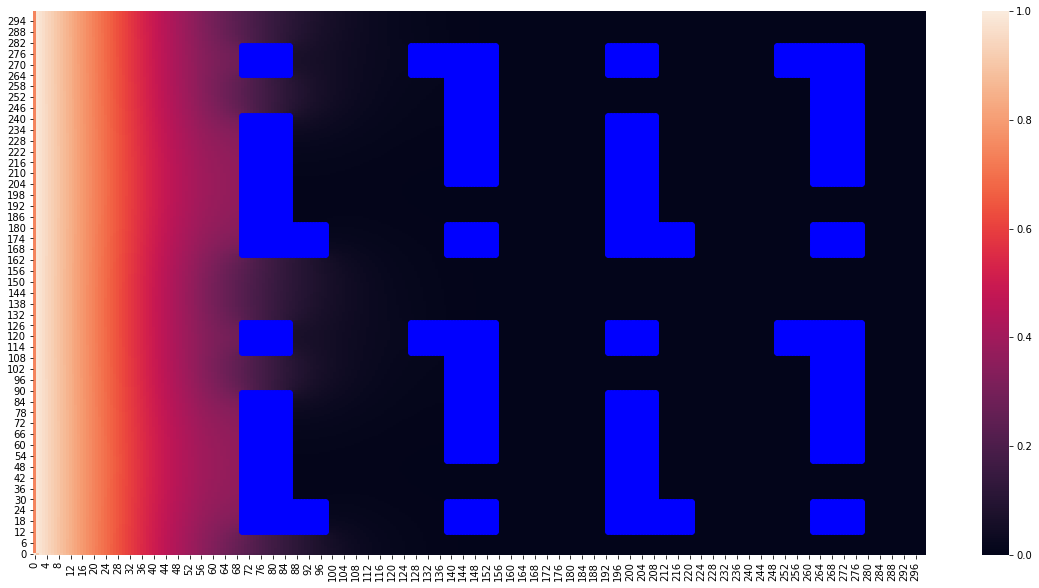

In [45]:
# example on small number of iterations
m = 300
x_res = convection_diffusion(n = m, iters = 5000, eps = 1e-5)
plt.figure(figsize=(20,10))

sns.heatmap(-x_res.T)
plt.gca().invert_yaxis()

h_x= []
h_y = []
for i in range (m):
  for j in range (m):
    if check_inside_house(i, j):
      h_x.append(i)
      h_y.append(j)
plt.scatter(h_x, h_y, color = 'blue')

plt.show()
x_res = -x_res.T

In [50]:
print_output(m, x_res)

300
0.9982526644569032 0.9964935575650313 0.9947225151990169 0.9929393688622365 0.9911439442536563 0.9893360597854368 0.987515525043115 0.9856821391797075 0.9838356892345408 0.9819759483669794 0.9801026739944828 0.9782156058235949 0.976314463761498 0.9743989456946794 0.9724687251200133 0.9705234486121511 0.9685627331095272 0.9665861629994679 0.9645932869808541 0.9625836146804754 0.9605566129965813 0.9585117021401844 0.9564482513412973 0.9543655741834917 0.9522629235258552 0.9501394859665476 0.9479943757966338 0.9458266283866245 0.9436351929410899 0.9414189245487292 0.9391765754462846 0.9369067854045608 0.9346080711334692 0.9322788145903295 0.9299172500616087 0.927521449872774 0.9250893085640537 0.9226185253517868 0.9201065846759737 0.9175507346152543 0.9149479629317083 0.9122949704911807 0.9095881417925348 0.9068235123348551 0.9039967325602872 0.9011030281394199 0.8981371564266971 0.8950933590206754 0.8919653105396693 0.8887460639974973 0.885427993577728 0.8820027362129361 0.8784611342

For eps = 1e-05, 36167 of steps were taken, total execution time = 0:00:31.873083


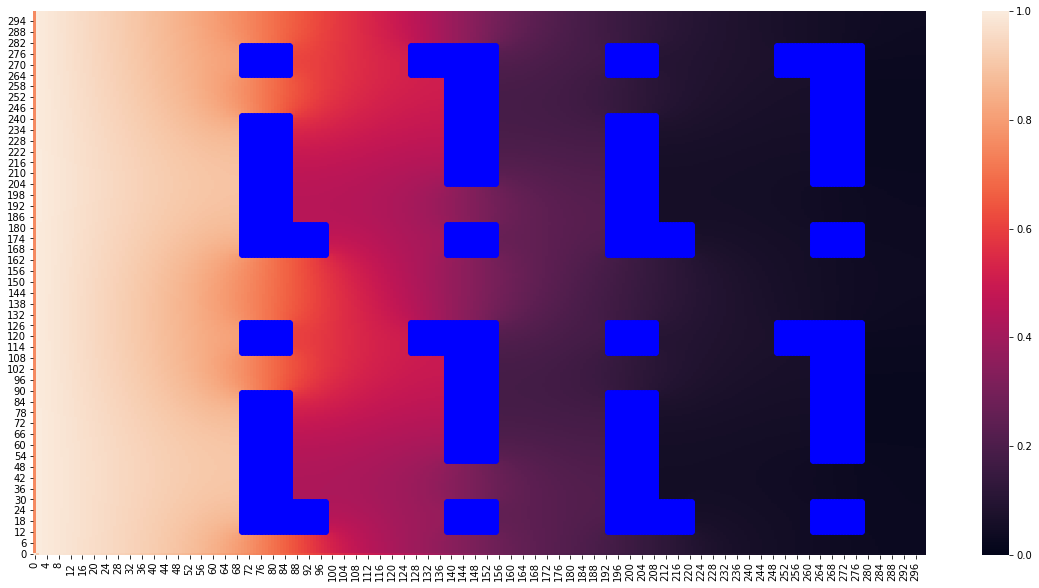

In [51]:
# example on large number of iterations and eps = 1e-6
m = 300
x_res = convection_diffusion(n = m, iters = 100000, eps = 1e-5)
plt.figure(figsize=(20,10))

sns.heatmap(-x_res.T)
plt.gca().invert_yaxis()

h_x= []
h_y = []
for i in range (m):
  for j in range (m):
    if check_inside_house(i, j):
      h_x.append(i)
      h_y.append(j)
plt.scatter(h_x, h_y, color = 'blue')

plt.show()
x_res = -x_res.T

In [52]:
print_output(m, x_res)

300
0.9982526644569032 0.9964935575650313 0.9947225151990169 0.9929393688622365 0.9911439442536563 0.9893360597854368 0.987515525043115 0.9856821391797075 0.9838356892345408 0.9819759483669794 0.9801026739944828 0.9782156058235949 0.976314463761498 0.9743989456946794 0.9724687251200133 0.9705234486121511 0.9685627331095272 0.9665861629994679 0.9645932869808541 0.9625836146804754 0.9605566129965813 0.9585117021401844 0.9564482513412973 0.9543655741834917 0.9522629235258552 0.9501394859665476 0.9479943757966338 0.9458266283866245 0.9436351929410899 0.9414189245487292 0.9391765754462846 0.9369067854045608 0.9346080711334692 0.9322788145903295 0.9299172500616087 0.927521449872774 0.9250893085640537 0.9226185253517868 0.9201065846759737 0.9175507346152543 0.9149479629317083 0.9122949704911807 0.9095881417925348 0.9068235123348551 0.9039967325602872 0.9011030281394199 0.8981371564266971 0.8950933590206754 0.8919653105396693 0.8887460639974973 0.885427993577728 0.8820027362129361 0.8784611342